<a href="https://colab.research.google.com/github/Krepseliss/1st-Assignment-GEM-DATABASE/blob/main/GEM-Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

df=pd.read_csv('/content/drive//MyDrive/micro_world_139countries.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **DATA CLEANING**

In [39]:
subset_cols=['economycode', 'age','fin7','fin8','fin8a','fin8b','fin22a','fin24','fin24','fin34a','anydigpayment','fin30','inc_q','educ','urbanicity_f2f','emp_in']
subset_df=df[subset_cols]
subset_df=subset_df.dropna()
subset_df.info() #made sure there are no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 1070 to 143851
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   economycode     2493 non-null   object 
 1   age             2493 non-null   float64
 2   fin7            2493 non-null   float64
 3   fin8            2493 non-null   float64
 4   fin8a           2493 non-null   float64
 5   fin8b           2493 non-null   float64
 6   fin22a          2493 non-null   int64  
 7   fin24           2493 non-null   int64  
 8   fin24           2493 non-null   int64  
 9   fin34a          2493 non-null   float64
 10  anydigpayment   2493 non-null   int64  
 11  fin30           2493 non-null   int64  
 12  inc_q           2493 non-null   int64  
 13  educ            2493 non-null   int64  
 14  urbanicity_f2f  2493 non-null   float64
 15  emp_in          2493 non-null   float64
dtypes: float64(8), int64(7), object(1)
memory usage: 331.1+ KB


In [66]:
subset_df['fin7'].sum()
subset_df['fin8'].sum()
#all the rows of fin7 and fin8 are =1 so everyone has and uses a CC

2493.0

### **GROUPING & PERCENTAGE CALCULATION**

In [82]:
subset_df['economycode'].mode()
cc_usage_country=subset_df.groupby('economycode')['fin8'].sum()

total_usage=cc_usage_country.sum()
total_usage_prc=(cc_usage_country/total_usage) * 100
print(total_usage_prc)

economycode
ALB    0.802246
ARM    1.083032
AZE    1.805054
BEN    0.280786
BFA    0.401123
         ...   
XKX    2.567188
YEM    0.320899
ZAF    3.289210
ZMB    0.561572
ZWE    0.200562
Name: fin8, Length: 71, dtype: float64


### **BAR CHART**

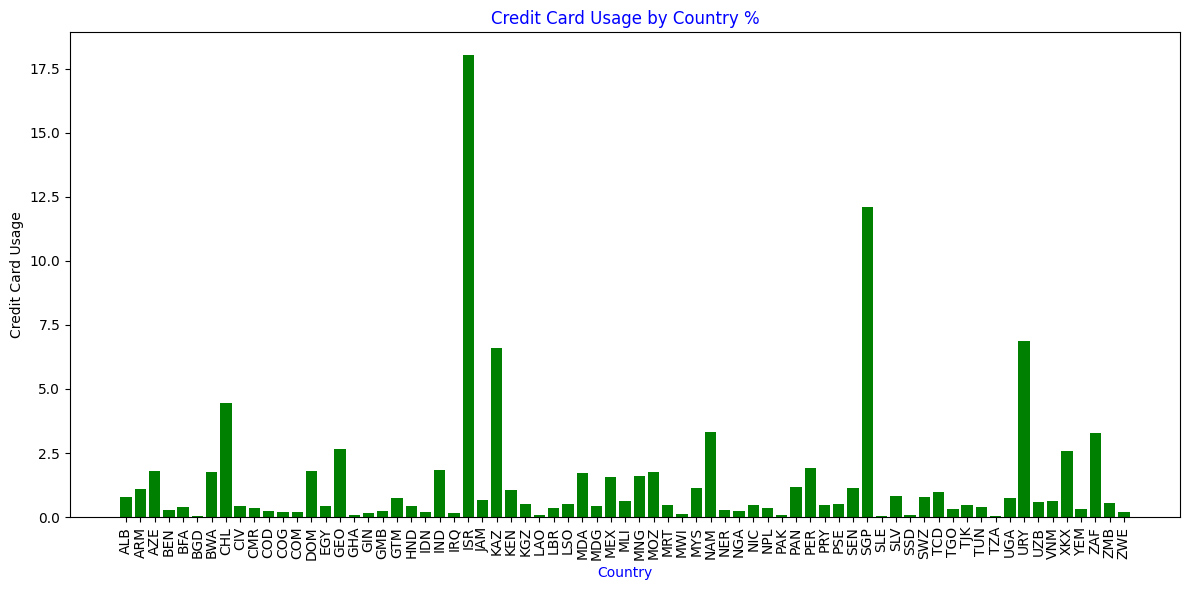

In [103]:
plt.figure(figsize=(12, 6))
plt.bar(total_usage_prc.index, total_usage_prc.values, color='green')
plt.xlabel('Country', color='blue')
plt.ylabel('Credit Card Usage')
plt.title('Credit Card Usage by Country %', color='blue')
plt.xticks(rotation=90)  #rotate country labels for better readability
plt.tight_layout() #autoadjust fit onscreen

plt.show()

In [170]:
#convert series variable to dataframe
df_percentage = total_usage_prc.reset_index()
df_percentage.columns = ['economycode', 'percentage']
countrycode_max= "ISR"
countrycode_min='BGD'

prcmax=df_percentage.loc[df_percentage['economycode']==countrycode_max, 'percentage']
prcmin=df_percentage.loc[df_percentage['economycode']==countrycode_min, 'percentage']
print(prcmax, prcmin)

prcmax=18.01
prcmin=0.04

min_prc_country = total_usage_prc.idxmin()
max_prc_country = total_usage_prc.idxmax()
print(f"The minimum CC usage is in: {min_prc_country} {prcmin} %","and " f"The maximum CC usage is in: {max_prc_country} {prcmax} %") #min:Bangladesh max:Israel

24    18.010429
Name: percentage, dtype: float64 5    0.040112
Name: percentage, dtype: float64
The minimum CC usage is in: BGD 0.04 % and The maximum CC usage is in: ISR 18.01 %


### **THE INDIVIDUALS FROM ISR WHO WERE NOT CAPABLE OF PAYING THE DEBT**
### **AGES YOUNGER AND OLDER THAN 25**

In [125]:
isr_under25_notpaid = df[(df['age'] < 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1 & (df['fin8b']==2) ))]
isr_over25_notpaid = df[(df['age'] >= 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1) & (df['fin8b']==2))]
len(isr_under25_notpaid)
isr_under25_notpaid_v=15
len(isr_over25_notpaid)
isr_over25_notpaid_v=47

### **THE INDIVIDUALS FROM ISR WHO WERE CAPABLE OF PAYING THE DEBT**
### **AGES YOUNGER AND OLDER THAN 25**

In [162]:
isr_under25_paid = df[(df['age'] < 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1 & (df['fin8b']==1) ))]
isr_over25_paid = df[(df['age'] >= 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1) & (df['fin8b']==1))]
len(isr_under25_paid)
isr_under25_paid_v=48
len(isr_over25_paid)
isr_over25_paid_v=610

under25_notpaid=(15/63)*100
over25_notpaid=(47/657)*100

print(f'under 25 and not paid {under25_notpaid} and over 25 and not paid {over25_notpaid}')

under 25 and not paid 23.809523809523807 and over 25 and not paid 7.15372907153729


### **BAR CHART**

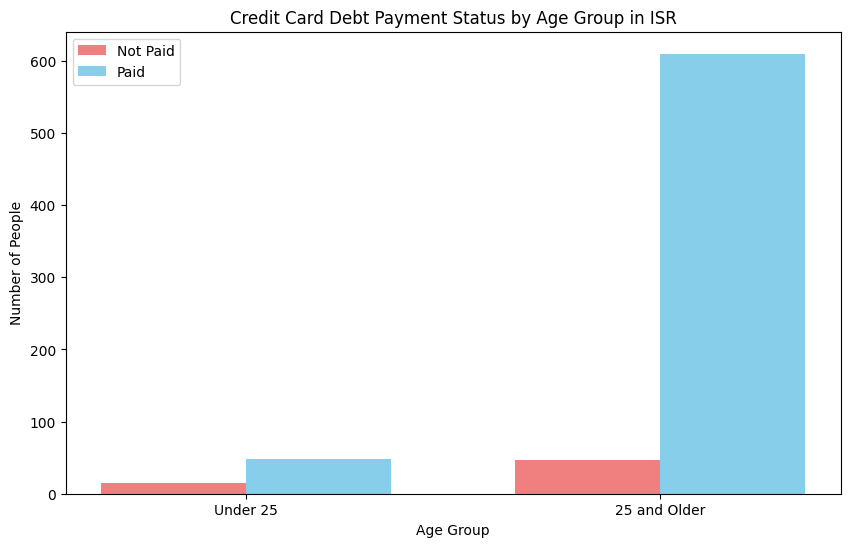

In [163]:
age_group = ['Under 25', '25 and Older']
not_paid = [isr_under25_notpaid_v, isr_over25_notpaid_v]
paid = [isr_under25_paid_v,isr_over25_paid_v]

x = np.arange(len(age_group)) #labels
width = 0.35  #bar width

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, not_paid, width, label='Not Paid', color='lightcoral')
ax.bar(x + width/2, paid, width, label='Paid', color='skyblue')

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of People')
ax.set_title('Credit Card Debt Payment Status by Age Group in ISR')
ax.set_xticks(x)
ax.set_xticklabels(age_group)
ax.legend()
plt.show()


In [153]:
isr_over25_paid_edu = df[(df['age'] >= 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1) & (df['fin8b']==1) & (df['educ']==2))]
len(isr_over25_paid_edu)
isr_over25_paid_edu_2 = 329
isr_over25_paid_edu = df[(df['age'] >= 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1) & (df['fin8b']==1) & (df['educ']==1))]
len(isr_over25_paid_edu)
isr_over25_paid_edu_1=11
isr_over25_paid_edu = df[(df['age'] >= 25) & (df['economycode'] == 'ISR') & (df['fin7']==1 & (df['fin8']==1) & (df['fin8b']==1) & (df['educ']==3))]
len(isr_over25_paid_edu)
isr_over25_paid_edu_3=270

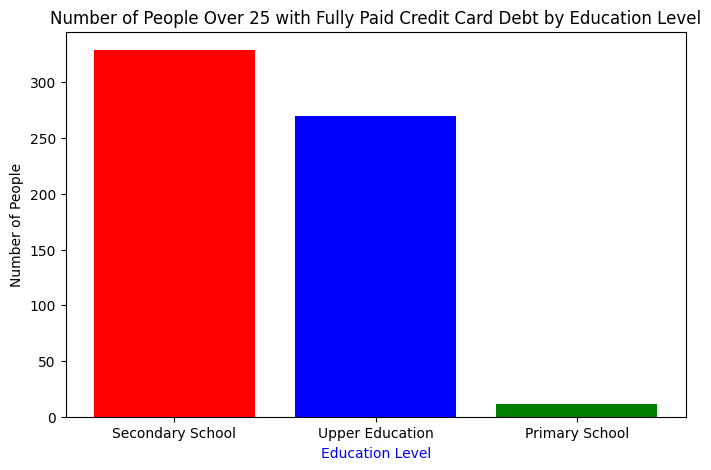

In [159]:
education_levels = ['Secondary School', 'Upper Education', 'Primary School']
paid_counts = [329, 270, 11]

plt.figure(figsize=(8, 5))
plt.bar(education_levels, paid_counts, color=['red', 'blue', 'green'])

plt.xlabel('Education Level', color='blue')
plt.ylabel('Number of People')
plt.title('Number of People Over 25 with Fully Paid Credit Card Debt by Education Level')
plt.show()